In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Csv Files

In [2]:
companies = pd.read_csv("D:/Upgrad/course_3/module3/companies.csv",encoding="ISO-8859-1")
rounds2 = pd.read_csv("D:/Upgrad/course_3/module3/rounds2.csv",encoding="ISO-8859-1")
mapping = pd.read_csv("D:/Upgrad/course_3/module3/mapping.csv",encoding="ISO-8859-1")

#### Analyzing companies dataset

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies.shape

(66368, 10)

In [5]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Mosaic-Mall,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


#### Analyzing rounds2 dataset

In [8]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
rounds2.shape

(114949, 6)

In [10]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [11]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [12]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


#### Finding Unique Companies in 'companies' and 'rounds2' Dataset

In [13]:
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore') 
companies['permalink'] = companies['permalink'].apply(lambda x: x.lower())
unq_comp = len(companies['permalink'].unique())
print(f"There are {unq_comp} unique companies present in companies dataset")

There are 66368 unique companies present in companies dataset


In [14]:
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.lower())
unq_comp = len(rounds2['company_permalink'].unique())
print(f"There are {unq_comp} unique companies present in rounds2 dataset")

There are 66368 unique companies present in rounds2 dataset


#### Companies in the 'rounds2' dataset which are not present in 'companies' dataset

In [15]:
#Check if all values between two dataset are same or not
#Print values which are not common
def find_common(a,b):
    set_a = set(a.flatten())
    set_b = set(b.flatten())
    print(f" A:{len(set_a)}, B:{len(set_b)}, Intersection:{len(set_a.intersection(set_b))}")
    if (len(set_a - set_b) > 0):
        print(set_a - set_b)
        print(set_b - set_a)
    else:
        print("No Uncommon companies are present")
        
find_common(companies.permalink.unique(),rounds2.company_permalink.unique())

 A:66368, B:66368, Intersection:66368
No Uncommon companies are present


#### Merging two dataset 'companies' and 'rounds2'

In [16]:
master_frame = companies.merge(rounds2, how="inner", left_on="permalink", right_on="company_permalink", suffixes=(False,False))
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [17]:
print(f"There are {len(master_frame)} observations in master_frame.")

There are 114949 observations in master_frame.


In [18]:
# Drop Columns which are not in use
# master_frame = master_frame.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at', 'funding_round_code', 'funded_at'],axis=1)
# master_frame.head()

#### Funding Type Analysis

In [19]:
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [20]:
# Selecting Investment type for Spark Fund
master_frame = master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

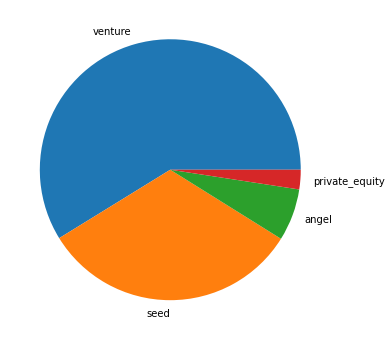

venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64


In [21]:
round_types = master_frame['funding_round_type'].value_counts()
rnd= np.round(100*(round_types.values / round_types.sum()),2)
#ploting in pie chart
plt.figure(figsize=(10,6))
plt.pie(round_types.values, labels=round_types.index)
plt.show()


print(round_types)

In [22]:
# Converting dollar($) to million dollar($)
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700000
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000


In [23]:
#calculating average investment amount for each of the four funding types.
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(),2)

funding_round_type
angel              0.96
private_equity    73.31
seed               0.72
venture           11.75
Name: raised_amount_usd, dtype: float64

In [24]:
# Average funding amount for venture type
venture_mean = master_frame[master_frame['funding_round_type']=='venture'].raised_amount_usd.mean()
print(f"Average funding amount raised: {round(venture_mean, 2)} million($)")

Average funding amount raised: 11.75 million($)


In [25]:
# Average funding amount for angel type
angel_mean = master_frame[master_frame['funding_round_type']=='angel'].raised_amount_usd.mean()
print(f"Average funding amount raised: {round(angel_mean, 2)} million($)")

Average funding amount raised: 0.96 million($)


In [26]:
# Average funding amount for seed type
seed_mean = master_frame[master_frame['funding_round_type']=='seed'].raised_amount_usd.mean()
print(f"Average funding amount raised: {round(seed_mean, 2)} million($)")

Average funding amount raised: 0.72 million($)


In [27]:
# Average funding amount for private equity type
equity_mean = master_frame[master_frame['funding_round_type']=='private_equity'].raised_amount_usd.mean()
print(f"Average funding amount raised: {round(equity_mean, 2)} million($)")

Average funding amount raised: 73.31 million($)


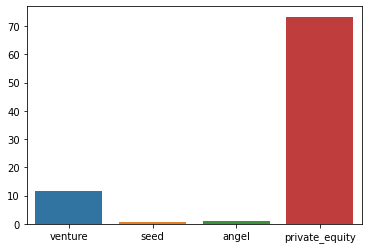

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x=round_types.index, y=[venture_mean, seed_mean, angel_mean, equity_mean])
plt.show()

In [29]:
# Filtering investment amount for company to invest between 5$ to  15$
invest_type={'seed':seed_mean,'angel':angel_mean,'venture':venture_mean,'private_equity':equity_mean}
def to_invest(val1,val2):
    for name,n in invest_type.items():
        if int(n) in range(val1,val2):
            num = round(n,2)
            print(f" '{name.upper()}' investment type is suitable for the company with funds of '{num}'")
        
        

to_invest(5,15) 

 'VENTURE' investment type is suitable for the company with funds of '11.75'


#### Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type
<ul>
    <li>Based on above data analysis, 'funding_round_type' equals to venture only satisfies criteria for Spark Funds to invest between</li>
    <li>Filter the data by creating a new DataFrame for venture funding type only</li>
</ul>

In [30]:
venture_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture',:]
venture_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,0.140500
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8.500000
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2.686600
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1.587301


### Country Analysis

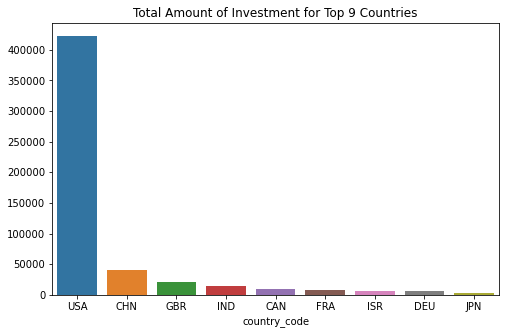

              raised_amount_usd
country_code                   
USA               422510.842796
CHN                39835.418773
GBR                20245.627416
IND                14391.858718
CAN                 9583.332317
FRA                 7259.536732
ISR                 6907.514579
DEU                 6346.959822
JPN                 3363.676611 

Top 3 English Speaking Countries are 'USA', 'GBR', 'IND' 


In [31]:
#As we know the type of investment suited for Spark Funds, let's narrow down the countries.
top9 = pd.DataFrame(venture_frame.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9))
plt.figure(figsize=(8,5))
sns.barplot(x=top9.index, y=top9.values.flatten()).set_title("Total Amount of Investment for Top 9 Countries")
plt.show()
print(top9,'\n')
print("Top 3 English Speaking Countries are 'USA', 'GBR', 'IND' ")

### Sector Analysis 1

In [34]:
# Generating a Primary Sector Column
master_frame['primary_sector'] = 0
master_frame['primary_sector'] = master_frame['category_list'].str.split('|', expand=True)
master_frame['primary_sector']

0                         Media
1         Application Platforms
2         Application Platforms
3                          Apps
4                   Curated Web
                  ...          
114942              Advertising
114943              Advertising
114945              Advertising
114946                      NaN
114947     Consumer Electronics
Name: primary_sector, Length: 94397, dtype: object

In [35]:
# correcting improperly decoded words from mapping.csv
mapping.reset_index(inplace=True)
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na')

In [36]:
mapping['category_list']

0                   NaN
1                    3D
2           3D Printing
3         3D Technology
4            Accounting
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 688, dtype: object

In [37]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping.head()

,category_list,variable,value
0,NaN,Manufacturing,0
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
4,Accounting,Manufacturing,0


In [38]:
#removing rows with value 0 and renaming the variable column with main_sector
mapping = mapping[~(mapping.value==0)]
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector,value
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
7,Advanced Materials,Manufacturing,1
15,Agriculture,Manufacturing,1


In [39]:
# master_frame = master_frame.merge(mapping, how ='left', on ='category_list')
master_frame = master_frame.merge(mapping, how='inner',left_on='primary_sector',right_on='category_list')
master_frame.head(35)


,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000000,Media,Media,Entertainment,1
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.000000,Media,Media,Entertainment,1
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.800000,Media,Media,Entertainment,1
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.000000,Media,Media,Entertainment,1
4,/organization/akira-mobile,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NaN,NaN,NaN,NaN,/organization/akira-mobile,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NaN,01-08-2012,0.018410,Media,Media,Entertainment,1
5,/organization/all-day-media,ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,/organization/all-day-media,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,NaN,16-12-2014,2.000000,Media,Media,Entertainment,1
6,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.000000,Media,Media,Entertainment,1
7,/organization/anthill-magazine,Anthill Magazine,http://anthillonline.com/,Media,operating,AUS,7,Melbourne,Melbourne,23-05-2009,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,NaN,09-04-2015,0.600000,Media,Media,Entertainment,1
8,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,0.650000,Media,Media,Entertainment,1
9,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,0.750000,Media,Media,Entertainment,1


In [40]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                3495
category_list_x                0
status                         0
country_code                5950
state_code                  7858
region                      7161
city                        7158
founded_at                 15218
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61064
funded_at                      0
raised_amount_usd          12104
primary_sector                 0
category_list_y                0
main_sector                    0
value                          0
dtype: int64

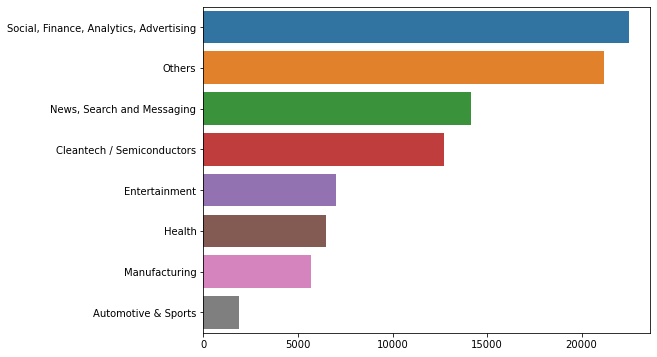

Social, Finance, Analytics, Advertising    22485
Others                                     21201
News, Search and Messaging                 14156
Cleantech / Semiconductors                 12712
Entertainment                               6991
Health                                      6487
Manufacturing                               5683
Automotive & Sports                         1883
Name: main_sector, dtype: int64


In [41]:
master_frame.dropna(subset=['main_sector'], inplace=True) 
master_frame = master_frame[master_frame['main_sector'] != 'Blanks']
sectors = master_frame.main_sector.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sectors.values, y=sectors.index)
plt.show()
print(sectors)

In [42]:
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

91598

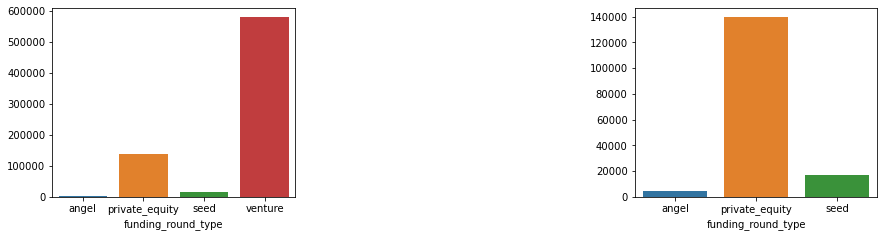

                    raised_amount_usd
funding_round_type                   
angel                     4592.012935
private_equity          139690.539061
seed                     16728.173124
venture                 580865.405001


In [43]:
# Aggregate of amount raised per round type
amount_per_type = master_frame.groupby('funding_round_type').agg({'raised_amount_usd': 'sum'})

plt.figure(figsize=(20, 16))
ax1 = plt.subplot(4, 4, 1)
ax2 = plt.subplot(4, 4, 3)

sns.barplot(x=amount_per_type.index, y=amount_per_type.values.ravel(), ax=ax1)
sns.barplot(x=amount_per_type.index[:3], y=amount_per_type.values.ravel()[:3], ax=ax2)
plt.show()

print(amount_per_type)

### Country-Wise Sector Analysis

In [44]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D1_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_gr, how='left', on ='main_sector')
# D1.head()
D1.head()

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector,value,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,venture,A,06-08-2014,5.0,Media,Media,Entertainment,1,5237.90797,609
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,...,venture,A,26-02-2015,5.0,Media,Media,Entertainment,1,5237.90797,609
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,...,venture,A,01-08-2006,5.0,Media,Media,Entertainment,1,5237.90797,609
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,...,venture,B,01-09-2007,5.0,Media,Media,Entertainment,1,5237.90797,609
4,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,...,venture,A,01-09-2007,10.0,Media,Media,Entertainment,1,5237.90797,609


In [45]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D2_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_gr, how='left', on ='main_sector')
D2.head()

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector,value,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,venture,NaN,06-10-2015,15.00,Media,Media,Entertainment,1,496.421949,57
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,venture,NaN,07-05-2013,5.80,Media,Media,Entertainment,1,496.421949,57
2,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,...,venture,NaN,09-07-2014,10.00,Application Platforms,Application Platforms,"News, Search and Messaging",1,673.988167,82
3,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,...,venture,NaN,01-10-2014,5.46,Application Platforms,Application Platforms,"News, Search and Messaging",1,673.988167,82
4,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,...,venture,A,05-10-2015,5.40,Application Platforms,Application Platforms,"News, Search and Messaging",1,673.988167,82


In [46]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D3_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_gr, how='left', on ='main_sector')
D3.head()

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector,value,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,venture,B,05-01-2015,10.000000,Media,Media,Entertainment,1,293.830000,34
1,/organization/chillr-2,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,...,venture,A,02-10-2015,6.000000,Apps,Apps,"News, Search and Messaging",1,439.834545,53
2,/organization/jugnoo,JUGNOO,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,...,venture,A,05-06-2015,5.000000,Apps,Apps,"News, Search and Messaging",1,439.834545,53
3,/organization/peppertap,PepperTap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,...,venture,A,14-04-2015,10.000000,Apps,Apps,"News, Search and Messaging",1,439.834545,53
4,/organization/tinyowl-technology,TinyOwl Technology,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,NaN,...,venture,C,30-10-2015,7.665775,Apps,Apps,"News, Search and Messaging",1,439.834545,53


In [47]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12487
654
340


In [48]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

111255.58
5649.1
3038.54


In [49]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1545.521856         178
Cleantech / Semiconductors                   22238.904605        2411
Entertainment                                 5237.907970         609
Health                                        8670.415735         965
Manufacturing                                 7453.792922         822
News, Search and Messaging                   14334.370804        1633
Others                                       27093.828149        3040
Social, Finance, Analytics, Advertising      24680.842626        2829

In [50]:
D1_gr.reset_index()

main_sector raised_amount_usd            
                                                Total_amount Total_count
0                      Automotive & Sports       1545.521856         178
1               Cleantech / Semiconductors      22238.904605        2411
2                            Entertainment       5237.907970         609
3                                   Health       8670.415735         965
4                            Manufacturing       7453.792922         822
5               News, Search and Messaging      14334.370804        1633
6                                   Others      27093.828149        3040
7  Social, Finance, Analytics, Advertising      24680.842626        2829

In [51]:
D1_gr['raised_amount_usd'].sort_values(by='Total_amount',ascending=False).head(3)

,Total_amount,Total_count
main_sector,,
Others,27093.828149,3040
"Social, Finance, Analytics, Advertising",24680.842626,2829
Cleantech / Semiconductors,22238.904605,2411


In [52]:
D1_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1545.521856         178
Cleantech / Semiconductors                   22238.904605        2411
Entertainment                                 5237.907970         609
Health                                        8670.415735         965
Manufacturing                                 7453.792922         822
News, Search and Messaging                   14334.370804        1633
Others                                       27093.828149        3040
Social, Finance, Analytics, Advertising      24680.842626        2829

In [53]:
D2_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            173.112570          17
Cleantech / Semiconductors                    1175.573817         131
Entertainment                                  496.421949          57
Health                                         231.537510          26
Manufacturing                                  391.969972          45
News, Search and Messaging                     673.988167          82
Others                                        1332.944436         153
Social, Finance, Analytics, Advertising       1173.555728         143

In [54]:
D2_gr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Automotive & Sports to Social, Finance, Analytics, Advertising
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (raised_amount_usd, Total_amount)  8 non-null      float64
 1   (raised_amount_usd, Total_count)   8 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 192.0+ bytes


In [55]:
D3_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            136.900000          13
Cleantech / Semiconductors                     173.980000          21
Entertainment                                  293.830000          34
Health                                         173.740000          20
Manufacturing                                  200.900000          21
News, Search and Messaging                     439.834545          53
Others                                        1045.909507         114
Social, Finance, Analytics, Advertising        573.449550          64

In [56]:
D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector,value,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,venture,A,06-08-2014,5.0,Media,Media,Entertainment,1,5237.90797,609
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,...,venture,A,26-02-2015,5.0,Media,Media,Entertainment,1,5237.90797,609
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,...,venture,A,01-08-2006,5.0,Media,Media,Entertainment,1,5237.90797,609
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,...,venture,B,01-09-2007,5.0,Media,Media,Entertainment,1,5237.90797,609
4,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,...,venture,A,01-09-2007,10.0,Media,Media,Entertainment,1,5237.90797,609


In [57]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream               64.3
                            raised_amount_usd
company_permalink                            
/organization/choicestream               73.3


In [58]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Cleantech / Semiconductors']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/eusa-pharma               35.6
                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies               37.5


In [59]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
company_permalink                            
/organization/firstcry-com               39.0
                                                raised_amount_usd
company_permalink                                                
/organization/gupshup-technology-india-pvt-ltd               33.0
